# NLP - lab 7

## Task 1

Read the classification of Named Entities.

## Task 2

Read the API of NER in Clarin.

## Task 3

Read the documentation of CCL format or more tourough documentation of CCL format.

## Task 4

Sort bills according to their size and take top 50 (largest) bills.

In [1]:
PATH_TO_BILLS = 'C:/Users/patry/OneDrive/Pulpit/Studia_II_stopien/NLP/lab_1/ustawy/'

In [2]:
import os

def get_bill_size(filename: str) -> int:

    f = os.path.join(PATH_TO_BILLS, filename)
    if os.path.isfile(f):
        size = os.path.getsize(f)
    return size

filenames = [_ for _ in os.listdir(PATH_TO_BILLS)]
sizes = [get_bill_size(filename) for filename in filenames]
bills_sizes_list = {filename:size for (filename, size) in zip(filenames, sizes)}
bills_sizes_list_sorted = sorted(bills_sizes_list.items(), key = lambda x: -x[1])
bills_sizes_list_sorted_top_50 = bills_sizes_list_sorted[:50]
bills_sizes_list_sorted_top_50 = {filename:size for filename, size in bills_sizes_list_sorted_top_50}
bills_sizes_list_sorted_top_50

{'2000_696.txt': 579582,
 '1996_465.txt': 420981,
 '2001_627.txt': 413929,
 '1997_555.txt': 396494,
 '2002_1689.txt': 352618,
 '2000_1186.txt': 275546,
 '1998_1118.txt': 271036,
 '1997_117.txt': 262973,
 '2001_1070.txt': 259359,
 '2001_1368.txt': 258344,
 '1997_714.txt': 254133,
 '2001_499.txt': 252007,
 '2003_1750.txt': 247958,
 '2001_1545.txt': 245282,
 '2000_991.txt': 243718,
 '2001_1229.txt': 239103,
 '1994_195.txt': 234195,
 '2000_1268.txt': 234077,
 '2003_2277.txt': 233681,
 '1997_926.txt': 233303,
 '2000_1104.txt': 231146,
 '1997_553.txt': 226097,
 '2004_2065.txt': 218719,
 '2004_1693.txt': 218389,
 '2004_880.txt': 216529,
 '2004_177.txt': 212340,
 '2003_423.txt': 190810,
 '1997_349.txt': 188718,
 '2000_1315.txt': 183107,
 '1999_930.txt': 182337,
 '1994_591.txt': 182152,
 '2004_2533.txt': 180335,
 '1996_110.txt': 179878,
 '1997_557.txt': 178805,
 '1999_95.txt': 175787,
 '2001_1381.txt': 174145,
 '2000_136.txt': 168282,
 '1996_460.txt': 163118,
 '2001_1438.txt': 161341,
 '1996_56

## Task 5

Use the lemmatized and sentence split documents (from ex. 5) to identify the expressions that consist of consecutive words starting with a capital letter (you will have to look at the inflected form of the word to check its capitalization) that do not occupy the first position in a sentence. 

We use Clarin-PL API to lemmatize and tokenize the bills.

In [3]:
PATH_TO_CLARIN_RESULT = 'C:/Users/patry/OneDrive/Pulpit/Studia_II_stopien/NLP/lab_4/Wynik'

In [4]:
import regex as reg

def parse_result(filename: str, path_to_results: str = PATH_TO_CLARIN_RESULT) -> list:
  """ Function returns list with tokenized senetences and lemmatized words within the sentences"""

  f = os.path.join(path_to_results, filename)

  if os.path.isfile(f):
    with open(f, encoding = 'utf-8') as file:
      f = file.read()

      # pattern = reg.findall(r'\<base\>(\S+)\<\/base\>\<ctag\>(\w+)', f)
      pattern = reg.findall(r'\<tok\>\n\s+.*\n.*',f)
      pattern = " ".join(pattern)
      capitalized = reg.findall(r'\<orth\>(\S+)<\/orth\>', f)
      lemmas = reg.findall(r'\<base\>(\S+)\<\/base\>\<ctag\>(\w+)', pattern)
      

  # temp_list = [word + ':' + tag for (word, tag) in pattern if word != ' ']
  result = [word for word, _ in lemmas if word != ' ']
  for idx, token in enumerate(capitalized):
    if token[0].isupper():
        result[idx] = result[idx].capitalize()

  return result

parse_result('1994_195.txt')[:10]

['Ustawa',
 'z',
 'dzień',
 '30',
 'czerwiec',
 '2000',
 'r',
 '.',
 'Prawo',
 'własność']

Now we find entity names in a single bill.

In [5]:
def find_entity_names(lemmatized_bill: list) -> list:

    result = []
    idx = 0

    while idx < len(lemmatized_bill):
        idx += 1
        if lemmatized_bill[idx-1] != '.' and lemmatized_bill[idx][0].isupper():
            temp_ = [_ for _ in lemmatized_bill[idx:]]
            pos = 0
            candidates = ''
            try:
                while temp_[pos][0].isupper():
                    candidates += f' {temp_[pos]}'
                    pos += 1
            except IndexError:
                pass
            result.append(candidates[1:])
            idx += pos
    return result

# We can test lemmatized and tokenized sentence from the exercise
find_entity_names(['Wczoraj', 'w', 'Kraków','mieć', 'miejsce', 'spotkanie', 'prezydenci', 'Polska', 'i', 'Stany', 'Zjednoczone'])

['Kraków', 'Polska', 'Stany Zjednoczone']

## **Task 6**

Compute the frequency of each identified expression and print 50 results with the largest number of occurrences.

In [6]:
entity_names_list = []

try:
    for filename in bills_sizes_list_sorted_top_50.keys():
        lemmatized_tokenized_list = parse_result(filename)
        entities = find_entity_names(lemmatized_tokenized_list)
        entity_names_list.extend(entities)
except IndexError:
    pass
entity_names_list[:10]

['Ustawa',
 'Art',
 'Dzieje_(apostolskie)',
 'Wega',
 'Minister',
 'Art',
 'Dzieje_(apostolskie)',
 'Art',
 'Minister Sprawa Wewnętrzny',
 'Minister']

In [7]:
from collections import Counter

frequency_entity_names = Counter(entity_names_list)
frequency_entity_names_sorted = sorted(frequency_entity_names.items(), key = lambda x: -x[1])
frequency_entity_names_sorted[:50]

[('Nr', 850),
 ('Art', 416),
 ('Dzieje_(apostolskie)', 200),
 ('Policja', 158),
 ('Kodeks', 118),
 ('Dziennik', 107),
 ('Państwowy Straż Pożarny', 106),
 ('Skarb Państwo', 92),
 ('Rzeczpospolita Polski', 74),
 ('D', 65),
 ('Minister', 62),
 ('Cn', 60),
 ('Narodowy Fundusz', 53),
 ('Prawo', 52),
 ('Wspólnota Europejski', 44),
 ('Rozdział', 39),
 ('Rad', 31),
 ('Minister Praca', 29),
 ('Polityka Socjalna', 28),
 ('Sąd Najwyższy', 28),
 ('Leśnictwo', 24),
 ('Przepis', 24),
 ('Minister Sprawiedliwość', 23),
 ('Starosta', 23),
 ('Zmiana', 23),
 ('Warszawa', 22),
 ('Minister Ochrona Środowisko', 22),
 ('Zasoby Naturalny', 22),
 ('Wojewoda', 21),
 ('Prezes Rad Minister', 20),
 ('Organ', 20),
 ('L', 20),
 ('Państwo', 19),
 ('Komendant Główny Policja', 19),
 ('Sprawiedliwość', 19),
 ('Olej', 19),
 ('Rad Minister', 18),
 ('W', 18),
 ('Główny Inspektor Nadzór Budowlany', 18),
 ('I', 17),
 ('Przetwórstwo Artykuł Rolny', 17),
 ('Minister Sprawa Wewnętrzny', 16),
 ('Inspekcja', 16),
 ('Polski', 16),

## **Task 7**

Apply the NER algorithm to identify the named entities in the same set of documents (not lemmatized) using the n82 model.

Firslty we will copy top 50 files from the previous tasks and send it to the Clarin, where we can apply NER algorithm using the n82 model by hands.

In [75]:
from lpmn_client import download_file, upload_file
from lpmn_client import Task


task = Task(lpmn='any2txt|wcrft2|liner2({"model":"n82"})')
task.email = "pkrukowski@student.agh.edu.pl"

file_id = upload_file("C:/Users/patry/OneDrive/Pulpit/Studia_II_stopien/NLP/lab_7/files.zip")  # zip file with the top 50 bills
output_file_id = task.run(file_id)
download_file(output_file_id, "./out")

## **Task 8**

Plot the frequency (histogram) of the coarse-grained classes (e.g. nam_adj, nam_eve, nam_fac).

To do this exercise I used this tutorial: https://github.com/CLARIN-PL/NlpRest2-Tutorials/blob/master/part3.ipynb

In [8]:
class Token:
    
    def __init__(self, orth, base, ctag):
        self.orth = orth
        self.base = base
        self.ctag = ctag
        
    def get_orth(self):
        return self.orth
    
    def get_base(self):
        return self.base
    
    def get_ctag(self):
        return self.ctag
        

class Annotation:
    
    def __init__(self, category, tokens):
        self.category = category
        self.tokens = tokens
        self.lemma = self.get_orth()
        
    def get_category(self):
        return self.category
    
    def get_tokens(self):
        return self.tokens
    
    def get_orth(self):
        return " ".join([token.get_orth() for token in self.tokens])

    def get_base(self):
        return " ".join([token.get_base() for token in self.tokens])
    
    def get_ctag(self):
        return " ".join([token.get_ctag() for token in self.tokens])
    
    def get_space(self):
        return " ".join(["True" for token in self.tokens])
    
    def get_lemma(self):
        return self.lemma
    
    def set_lemma(self, lemma):
        self.lemma = lemma

    def __str__(self):
        return "[%s] %s" % (self.get_category(), self.get_lemma())

In [9]:
import xml.etree.ElementTree as ET

def sentence_ner(sentence):
    channels = {}
    for token in sentence.iter("tok"):
        orth = token.find("./orth").text
        base = token.find("./lex/base").text
        ctag = token.find("./lex/ctag").text
        t = Token(orth, base, ctag)
        for channel in token.iter("ann"):            
            index = int(channel.text)
            chan = channel.attrib["chan"]            
            if index > 0:                
                channels.setdefault(chan, {}) \
                        .setdefault(index, []) \
                        .append(t)
                
    annotations = []
    for (ann_type, group) in channels.items():
        for tokens in group.values():            
            an = Annotation(ann_type, tokens)
            annotations.append(an)
    
    return annotations
                

def ccl_ner(ccl):
    tree = ET.fromstring(ccl)
    annotations = []
    for sentence in tree.iter("sentence"):
        annotations += sentence_ner(sentence)
    return annotations

We can see that it works fine.

In [10]:
import zipfile

PATH_TO_N82_RESULTS = 'C:/Users/patry/OneDrive/Pulpit/Studia_II_stopien/NLP/lab_7/Wynik.zip'

zf = zipfile.ZipFile(PATH_TO_N82_RESULTS, 'r')
ccl = zf.read(zf.namelist()[0]).decode("utf-8-sig")
annotations = ccl_ner(ccl)
for annotation in annotations[:10]:
    print(annotation)

[nam_pro_media_periodic] Dz . U .
[nam_org_institution] CZĘŚĆ OGÓLNA
[nam_loc_gpe_country] Rzeczypospolitej Polskiej
[nam_loc_gpe_country] Rzeczpospolita Polska
[nam_oth_currency] złotych
[nam_oth_currency] złotych
[nam_org_institution] Skarbu Państwa
[nam_org_institution] Skarbu Państwa
[nam_org_institution] Skarbu Państwa
[nam_org_institution] Skarbu Państwa


In [11]:
document_annotations = {}
for filename in zf.namelist():
    ccl = zf.read(filename)
    document_annotations[filename] =  ccl_ner(ccl)

Now we can calculate frequencies.

In [12]:
from collections import defaultdict

freq_coarse_grained_class_dict = defaultdict(int)

for filename in zf.namelist():
    ccl = zf.read(filename)
    annotations =  ccl_ner(ccl)
    for annotation in annotations:
        category = annotation.get_category()
        category_parsed = category.split('_')
        category_parsed = category_parsed[0] + '_' + category_parsed[1]
        freq_coarse_grained_class_dict[category_parsed] += 1

Now we can plot a histogram.

<BarContainer object of 9 artists>

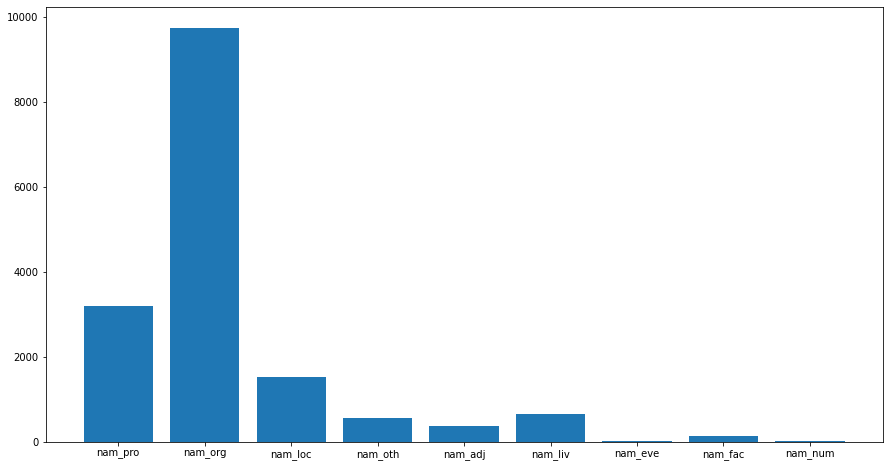

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
plt.bar(freq_coarse_grained_class_dict.keys(), freq_coarse_grained_class_dict.values())

## **Task 9**

Display 10 most frequent Named Entities for each coarse-grained type.

In [14]:
freq_coarse_grained_class_entity_dict = defaultdict(lambda: defaultdict(int))

for filename in zf.namelist():
    ccl = zf.read(filename)
    annotations =  ccl_ner(ccl)
    for annotation in annotations:
        category = annotation.get_category()
        category_parsed = category.split('_')
        category_parsed = category_parsed[0] + '_' + category_parsed[1]
        entity = annotation.get_lemma()
        freq_coarse_grained_class_entity_dict[category_parsed][entity] += 1

In [15]:
print('###########################################################')
print('#CATEGORY # COUNT#           ENTITY')
for category, entities in freq_coarse_grained_class_entity_dict.items():
    print('###########################################################')
    for entity, count in list(sorted(entities.items(), key=lambda pair: -pair[1]))[:10]:
        print(f'# {category} # {str(count).ljust(4)} # {entity.ljust(38)} #')
print('###########################################################')


###########################################################
#CATEGORY # COUNT#           ENTITY
###########################################################
# nam_pro # 1534 # Dz . U .                               #
# nam_pro # 80   # Dz . Urz                               #
# nam_pro # 71   # Ordynacja podatkowa                    #
# nam_pro # 64   # Kodeksu karnego                        #
# nam_pro # 62   # Monitor Polski                         #
# nam_pro # 51   # Spraw Wewnętrznych                     #
# nam_pro # 35   # Kodeksu postępowania administracyjnego #
# nam_pro # 33   # Kodeksu postępowania karnego           #
# nam_pro # 32   # Kodeksu postępowania cywilnego         #
# nam_pro # 26   # Natura 2000                            #
###########################################################
# nam_org # 295  # Skarbu Państwa                         #
# nam_org # 291  # Unii Europejskiej                      #
# nam_org # 261  # Rada Ministrów                         #
# na

## **Task 10**

Display 50 most frequent Named Entities including their count and fine-grained type.

In [16]:
freq_fine_grained_class_entity_dict = defaultdict(int)

for filename in zf.namelist():
    ccl = zf.read(filename)
    annotations =  ccl_ner(ccl)
    for annotation in annotations:
        category = annotation.get_category()
        entity = annotation.get_lemma()
        freq_fine_grained_class_entity_dict[(entity, category)] += 1


In [17]:
freq_fine_grained_class_entity_dict_sorted_top_50 = sorted(freq_fine_grained_class_entity_dict.items(), key=lambda elem: -elem[1])[:50]
freq_fine_grained_class_entity_dict_sorted_top_50[:10]

[(('Dz . U .', 'nam_pro_media_periodic'), 1534),
 (('Rzeczypospolitej Polskiej', 'nam_loc_gpe_country'), 812),
 (('Skarbu Państwa', 'nam_org_institution'), 295),
 (('zł', 'nam_oth_currency'), 293),
 (('Unii Europejskiej', 'nam_org_organization'), 290),
 (('Rada Ministrów', 'nam_org_institution'), 261),
 (('Minister Sprawiedliwości', 'nam_org_institution'), 233),
 (('Prezes Rady Ministrów', 'nam_org_institution'), 213),
 (('Państwowej Straży Pożarnej', 'nam_org_organization'), 205),
 (('Minister Obrony Narodowej', 'nam_org_institution'), 162)]

In [18]:
print('###################################################################################')
print('# COUNT#                 ENTITY                          # CATEGORY')
for entity, count in freq_fine_grained_class_entity_dict_sorted_top_50:
    entity, category = entity
    print(f'# {str(count).ljust(4)} # {entity.ljust(48)}# {category.ljust(22)} #')
print('###################################################################################')

###################################################################################
# COUNT#                 ENTITY                          # CATEGORY
# 1534 # Dz . U .                                        # nam_pro_media_periodic #
# 812  # Rzeczypospolitej Polskiej                       # nam_loc_gpe_country    #
# 295  # Skarbu Państwa                                  # nam_org_institution    #
# 293  # zł                                              # nam_oth_currency       #
# 290  # Unii Europejskiej                               # nam_org_organization   #
# 261  # Rada Ministrów                                  # nam_org_institution    #
# 233  # Minister Sprawiedliwości                        # nam_org_institution    #
# 213  # Prezes Rady Ministrów                           # nam_org_institution    #
# 205  # Państwowej Straży Pożarnej                      # nam_org_organization   #
# 162  # Minister Obrony Narodowej                       # nam_org_institution    #
# 152  #

## **Task 11**

Display 5 sentences containing at least 2 recognized named entities with different types. Highlight the recognized spans with color. (For demo application Streamlit might be useful for displaying NER results).

In [19]:
dict_with_annotations = defaultdict(lambda: list())

for filename in zf.namelist():
    ccl = zf.read(filename)
    annotations = ccl_ner(ccl)
    for annotation in annotations:
        category = annotation.get_category()
        entity = annotation.get_orth()
        if (category, entity) not in dict_with_annotations[filename]:
            dict_with_annotations[filename].append((category, entity))

In [20]:
dict_with_sentences_from_50_bills = defaultdict(lambda: list())
PATH_TO_50_BILLS = 'C:/Users/patry/OneDrive/Pulpit/Studia_II_stopien/NLP/lab_7/files/'

for filename in os.listdir(PATH_TO_50_BILLS):
    f = os.path.join(PATH_TO_50_BILLS, filename)

    if os.path.isfile(f):
        with open(f, encoding = 'utf-8') as file:
            f = file.read()
            dict_with_sentences_from_50_bills[filename] = f.split('.')

In [21]:
dict_with_sentences = defaultdict(lambda: list())
for filename in dict_with_sentences_from_50_bills.keys():
    for sentence in dict_with_sentences_from_50_bills[filename]:
        categories = [elem[0] for elem in dict_with_annotations[filename]]
        entities = [elem[1] for elem in dict_with_annotations[filename]]
        for category, entity in zip(categories, entities):
            if entity in sentence and (sentence, entity, category) not in dict_with_sentences[filename]:
                dict_with_sentences[filename].append((sentence, entity, category))

In [22]:
sentences = defaultdict(lambda: list())

for filename in dict_with_sentences.keys():
    for (sentence, entity, category) in dict_with_sentences[filename]:
        if category not in [elem[1] for elem in sentences[sentence]]:
            sentences[sentence].append((entity, category))
sentences = dict([elem for elem in sentences.items() if len(elem[1]) > 1])

**First sentence**

In [23]:
from termcolor import colored

sentence = ' Ilekroć w ustawie jest mowa o:\n   1) osobie - rozumie się przez to osobę fizyczną lub prawną,\n   2) osobie zagranicznej - rozumie się przez to osobę niemającą obywatelstwa\n     polskiego i odpowiednio miejsca zamieszkania albo siedziby bądź poważnego\n     przedsiębiorstwa na obszarze Rzeczypospolitej Polskiej,\n   3) przedsiębiorcy - rozumie się przez to osobę prowadzącą w celach\n     zarobkowych działalność wytwórczą, budowlaną, handlową lub usługową, zwaną\n     dalej "działalnością gospodarczą",\n   4) umowie międzynarodowej - rozumie się przez to umowę międzynarodową,\n     której stroną jest Rzeczpospolita Polska,\n   5) Konwencji paryskiej - rozumie się przez to Akt sztokholmski zmieniający\n     Konwencję paryską o ochronie własności przemysłowej z dnia 20 marca 1883\n     r'
text_1 = colored('Rzeczpospolita Polska', 'red', attrs=['reverse', 'blink'])
text_2 = colored('Konwencję paryską', 'red', attrs=['reverse', 'blink'])
text_3 = colored('polskiego', 'red', attrs=['reverse', 'blink'])
sentences[sentence]

[('Rzeczypospolitej Polskiej', 'nam_loc_gpe_country'),
 ('Konwencję paryską', 'nam_pro_title_document'),
 ('polski', 'nam_adj_country')]

In [24]:
print(f'Ilekroć w ustawie jest mowa o:\n   1) osobie - rozumie się przez to osobę fizyczną lub prawną,\n   2) osobie zagranicznej - rozumie się przez to osobę niemającą obywatelstwa\n     {text_3} i odpowiednio miejsca zamieszkania albo siedziby bądź poważnego\n     przedsiębiorstwa na obszarze Rzeczypospolitej Polskiej,\n   3) przedsiębiorcy - rozumie się przez to osobę prowadzącą w celach\n     zarobkowych działalność wytwórczą, budowlaną, handlową lub usługową, zwaną\n     dalej "działalnością gospodarczą",\n   4) umowie międzynarodowej - rozumie się przez to umowę międzynarodową,\n     której stroną jest {text_1},\n   5) Konwencji paryskiej - rozumie się przez to Akt sztokholmski zmieniający\n     {text_2} o ochronie własności przemysłowej z dnia 20 marca 1883\n     r')

Ilekroć w ustawie jest mowa o:
   1) osobie - rozumie się przez to osobę fizyczną lub prawną,
   2) osobie zagranicznej - rozumie się przez to osobę niemającą obywatelstwa
     polskiego i odpowiednio miejsca zamieszkania albo siedziby bądź poważnego
     przedsiębiorstwa na obszarze Rzeczypospolitej Polskiej,
   3) przedsiębiorcy - rozumie się przez to osobę prowadzącą w celach
     zarobkowych działalność wytwórczą, budowlaną, handlową lub usługową, zwaną
     dalej "działalnością gospodarczą",
   4) umowie międzynarodowej - rozumie się przez to umowę międzynarodową,
     której stroną jest Rzeczpospolita Polska,
   5) Konwencji paryskiej - rozumie się przez to Akt sztokholmski zmieniający
     Konwencję paryską o ochronie własności przemysłowej z dnia 20 marca 1883
     r


**Second sentence**

In [25]:
sentence = ' Informacje niejawne wymieniane przez Rzeczpospolitą Polską z Organizacją\n   Traktatu Północnoatlantyckiego, Unią Europejską, i Unią Zachodnioeuropejską\n   oraz z innymi organizacjami międzynarodowymi i państwami, oznaczone klauzulą\n   "TOP SECRET" lub równorzędną'
text_1 = colored('Rzeczpospolitą Polską', 'red', attrs=['reverse', 'blink'])
text_2 = colored('Unią Europejską', 'red', attrs=['reverse', 'blink'])
text_3 = colored('TOP SECRET', 'red', attrs=['reverse', 'blink'])
sentences[sentence]

[('Rzeczpospolitą Polską', 'nam_loc_gpe_country'),
 ('Unią Europejską', 'nam_org_organization'),
 ('TOP SECRET', 'nam_eve_human')]

In [26]:
print(f' Informacje niejawne wymieniane przez {text_1} z Organizacją\n   Traktatu Północnoatlantyckiego, {text_2}, i Unią Zachodnioeuropejską\n   oraz z innymi organizacjami międzynarodowymi i państwami, oznaczone klauzulą\n   "{text_3}" lub równorzędną')

 Informacje niejawne wymieniane przez Rzeczpospolitą Polską z Organizacją
   Traktatu Północnoatlantyckiego, Unią Europejską, i Unią Zachodnioeuropejską
   oraz z innymi organizacjami międzynarodowymi i państwami, oznaczone klauzulą
   "TOP SECRET" lub równorzędną


**Third sentence**

In [27]:
sentence = ' Pierwszeństwo do uzyskania patentu, prawa ochronnego albo prawa z\n  rejestracji oznacza się, na zasadach określonych w umowach międzynarodowych,\n  według daty wystawienia wynalazku, wzoru użytkowego albo wzoru przemysłowego\n  w Polsce lub za granicą, na wystawie międzynarodowej oficjalnej lub\n  oficjalnie uznanej, jeżeli zgłoszenie w Urzędzie Patentowym tego wynalazku,\n  wzoru użytkowego albo wzoru przemysłowego dokonane zostanie w okresie 6\n  miesięcy od tej daty'
text_1 = colored('Urzędzie Patentowym', 'red', attrs=['reverse', 'blink'])
text_2 = colored('Polsce', 'red', attrs=['reverse', 'blink'])
sentences[sentence]

[('Urzędzie Patentowym', 'nam_org_institution'),
 ('Polsce', 'nam_loc_gpe_country')]

In [28]:
print(f' Pierwszeństwo do uzyskania patentu, prawa ochronnego albo prawa z\n  rejestracji oznacza się, na zasadach określonych w umowach międzynarodowych,\n  według daty wystawienia wynalazku, wzoru użytkowego albo wzoru przemysłowego\n  w {text_2} lub za granicą, na wystawie międzynarodowej oficjalnej lub\n  oficjalnie uznanej, jeżeli zgłoszenie w {text_1} tego wynalazku,\n  wzoru użytkowego albo wzoru przemysłowego dokonane zostanie w okresie 6\n  miesięcy od tej daty')

 Pierwszeństwo do uzyskania patentu, prawa ochronnego albo prawa z
  rejestracji oznacza się, na zasadach określonych w umowach międzynarodowych,
  według daty wystawienia wynalazku, wzoru użytkowego albo wzoru przemysłowego
  w Polsce lub za granicą, na wystawie międzynarodowej oficjalnej lub
  oficjalnie uznanej, jeżeli zgłoszenie w Urzędzie Patentowym tego wynalazku,
  wzoru użytkowego albo wzoru przemysłowego dokonane zostanie w okresie 6
  miesięcy od tej daty


**Fourth sentence**

In [29]:
sentence = ' 3, wskazanej przez Prezesa Urzędu Patentowego w drodze obwieszczenia w\n  Dzienniku Urzędowym Rzeczypospolitej Polskiej "Monitor Polski"'
text_1 = colored('Rzeczypospolitej Polskiej', 'red', attrs=['reverse', 'blink'])
text_2 = colored('Urzędu Patentowego', 'red', attrs=['reverse', 'blink'])
text_3 = colored('Monitor Polski', 'red', attrs=['reverse', 'blink'])
sentences[sentence]

[('Rzeczypospolitej Polskiej', 'nam_loc_gpe_country'),
 ('Urzędu Patentowego', 'nam_org_institution'),
 ('Monitor Polski', 'nam_pro_title')]

In [30]:
print(f' 3, wskazanej przez Prezesa {text_2} w drodze obwieszczenia w\n  Dzienniku Urzędowym {text_1} "{text_3}"')

 3, wskazanej przez Prezesa Urzędu Patentowego w drodze obwieszczenia w
  Dzienniku Urzędowym Rzeczypospolitej Polskiej "Monitor Polski"


**Fifth sentence**

In [31]:
sentence = ' Zastosowanie przez funkcjonariusza Straży Parku środka przymusu\n  bezpośredniego powinno odpowiadać potrzebom wynikającym z zaistniałej\n  sytuacji i zmierzać do podporządkowania się osoby poleceniom wydanym przez\n  funkcjonariusza'
text = colored('Straży Parku', 'red', attrs=['reverse', 'blink'])
sentences[sentence]

[('Straży Parku', 'nam_pro_title'),
 ('Straży Parku', 'nam_org_institution'),
 ('Straży Parku', 'nam_org_company')]

In [32]:
print(f' Zastosowanie przez funkcjonariusza {text} środka przymusu\n  bezpośredniego powinno odpowiadać potrzebom wynikającym z zaistniałej\n  sytuacji i zmierzać do podporządkowania się osoby poleceniom wydanym przez\n  funkcjonariusza')

 Zastosowanie przez funkcjonariusza Straży Parku środka przymusu
  bezpośredniego powinno odpowiadać potrzebom wynikającym z zaistniałej
  sytuacji i zmierzać do podporządkowania się osoby poleceniom wydanym przez
  funkcjonariusza


## **Task 12**

Answer the following questions:
* Which of the method (counting expressions with capital letters vs. NER) worked better for the task concerned with identification of the proper names?
* What are the drawbacks of the method based on capital letters?
* What are the drawbacks of the method based on NER?
* Which of the coarse-grained NER groups has the best and which has the worst results? Try to justify this observation.
* Do you think NER is sufficient for identifying different occurrences of the same entity (i.e. consider "USA" and "Stany Zjednoczone" and "Stany Zjednoczone Ameryki Północnej")? If not, can you suggest an algorithm or a tool that would be able to group such names together?
* Can you think of a real world problem that would benefit the most from application of Named Entity Recognition algorithm?

**Which of the method (counting expressions with capital letters vs. NER) worked better for the task concerned with identification of the proper names?**

The NER algorithm was able to catch more cases than our algorithm with counting expressions with capital letters used in the task. For example, NER founds the names of currencies ("zł") and adjectives derived from proper names are started with a lowercase letter.

**What are the drawbacks of the method based on capital letters?**

Such methods are unlikely to catch instances of names in which certain words are started with a lowercase letter, e.g. such an algorithm will be able to catch the name of a political party "PiS," but "Prawo i Sprawiedliwość" will no longer be caught by it. 

Take, for example, the phrase "Minister Pracy Senat odwiedził". Such an algorithm will classify "Minister Pracy Senat" as one proper name.

**What are the drawbacks of the method based on NER?**

It seems to me that one of the biggest drawbacks of the NER algorithm is the fact that the algorithm has problems finding the correct proper name when it is designated ambiguously. For example we can take a look at the following example:

In [33]:
list(sentences.items())[-20]

(' Zastosowanie przez funkcjonariusza Straży Parku środka przymusu\n  bezpośredniego powinno odpowiadać potrzebom wynikającym z zaistniałej\n  sytuacji i zmierzać do podporządkowania się osoby poleceniom wydanym przez\n  funkcjonariusza',
 [('Straży Parku', 'nam_pro_title'),
  ('Straży Parku', 'nam_org_institution'),
  ('Straży Parku', 'nam_org_company')])

In this case, it is probably the first class, while the NER algorithm is not able to extract the appropriate information for disambiguation.

I think that NER could also has a problem with some proper names written using abbreviations.

**Which of the coarse-grained NER groups has the best and which has the worst results? Try to justify this observation.**

* nam_pro - This class refers to the names of products or brands of various kinds. So it seems to me that the results for this class are bad, because, for example, the "Kodeks postępowania cywilnego" or "Spraw Wewnętrznych" does not have much to do with products in the broad sense.
* nam_org - Some of the results make sense, such as "Unii Europejskiej" and some do not, such as "Prezes Rady Ministrów" or "Minister Finansów".
* nam_loc - Most of the results seem reasonable, although the NER algorithm sometimes gets it wrong, such gets wrong in the case of "Konfederacja Szwajcarska".
* nam_oth - According to the KPWr guidelines, this class includes all those proper names that the algorithm has not assigned to the other classes. Looking at the examples in the KPWr documentation, the proper names in this case were classified quite well. Unfortunately, some of the proper names that should have been assigned to this class have not been assigned to it.
* nam_adj - Adjectives of the proper names look like properly classified.
* nam_liv - In this case, the NER algorithm did not work well, because this class includes proper names refering to living beings. Instead, the class was assigned proper names such as "Kasy Chorych" or "Sił Zbrojnych".
* nam_eve - This class refers to proper names concerning the names of events. In this case, the NER algorithm did not do well either, we can see that proper names such as "Przejściowy Plan Krajowy" or "Inspektor Nadzoru Wewnętrznego" were assigned to this class.
* nam_fac - The results are not satisfactory in my opinion, for example, "Komendant Główny" or "Krajowy Rejestr Karny" were misclassified.
* nam_num - The results were classified correctly.

**Do you think NER is sufficient for identifying different occurrences of the same entity (i.e. consider "USA" and "Stany Zjednoczone" and "Stany Zjednoczone Ameryki Północnej")? If not, can you suggest an algorithm or a tool that would be able to group such names together?**

Observing the results of previous tasks, one could say that NER will not be able to handle with this task. To improve the algorithm, we could use WordNet to catch such cases.

**Can you think of a real world problem that would benefit the most from application of Named Entity Recognition algorithm?**

Some applications:
* Document indexing and search engine - NER can be a tool for indexing and cataloging textual document datasets, like online reports, news, and articles. It could extract meaningful entities from them which will then classify these reports into various classes appropriately. These identified entities can be used for indexing the documents which will help the search engines to perform well for recommending relevant documents based on the search keyword.
* Chatbots - The purpose of having the implementation of NER in the chatbot is to find the answers to many fact-based questions and these answers are the entities that can be detected using NER. NER in chatbot systems makes the task of finding answers a lot more efficient as it saves time without having to interact with the customer support staff.
* Opinion mining - The entity can be referred as products, individuals, services, etc. NER is considered as one of the important components in opinion mining as it is used to extract the relevant attributes of products or entities. From these extracted data, the opinion analysis can be done accordingly over time to determine whether the product sentiment classification rises or falls (positive or negative).

The answer to this question was inspired by the blog https://medium.com/thelorry-product-tech-data/a-quick-overview-named-entity-recognition-ner-in-natural-language-processing-b7a892fad24a